In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [3]:
picture_size = 48
folder_path = "images/"

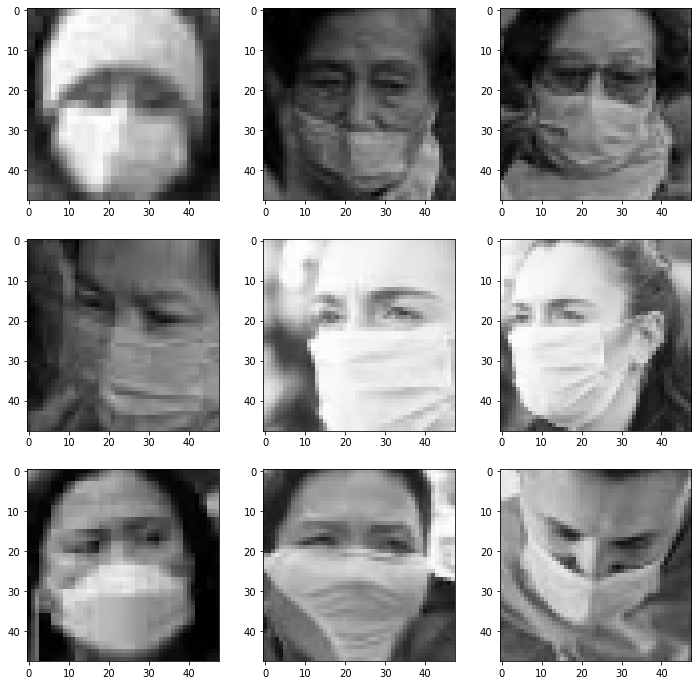

In [4]:
expression = 'withmask'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [22]:
datagen_train  = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=128,
                                              class_mode='categorical')


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=128,
                                              class_mode='categorical')

Found 9924 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [19]:
train_set.image_shape

(48, 48, 1)

In [20]:
train_set.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [24]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))



model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 128)        

In [27]:
result = model.fit(train_set,
                   steps_per_epoch=train_set.n//train_set.batch_size,
                   epochs=15,
                   validation_data = test_set,
                   validation_steps = test_set.n//test_set.batch_size)

Epoch 1/15
77/77 [==============================] - 78s 998ms/step - loss: 0.1855 - accuracy: 0.9246 - val_loss: 0.1739 - val_accuracy: 0.9310
Epoch 2/15
77/77 [==============================] - 66s 851ms/step - loss: 0.1581 - accuracy: 0.9401 - val_loss: 0.1711 - val_accuracy: 0.9323
Epoch 3/15
77/77 [==============================] - 66s 862ms/step - loss: 0.1427 - accuracy: 0.9456 - val_loss: 0.1478 - val_accuracy: 0.9375
Epoch 4/15
77/77 [==============================] - 67s 864ms/step - loss: 0.1356 - accuracy: 0.9501 - val_loss: 0.1370 - val_accuracy: 0.9466
Epoch 5/15
77/77 [==============================] - 67s 872ms/step - loss: 0.1237 - accuracy: 0.9553 - val_loss: 0.1492 - val_accuracy: 0.9479
Epoch 6/15
77/77 [==============================] - 66s 862ms/step - loss: 0.1168 - accuracy: 0.9566 - val_loss: 0.1517 - val_accuracy: 0.9453
Epoch 7/15
77/77 [==============================] - 66s 862ms/step - loss: 0.1117 - accuracy: 0.9596 - val_loss: 0.1228 - val_accuracy: 0.9596

In [28]:
model.save('fmaskmodel.h5')

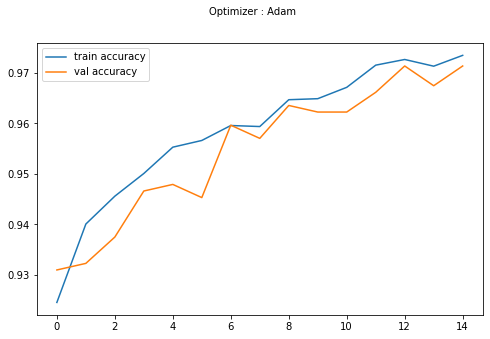

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(8, 5))
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

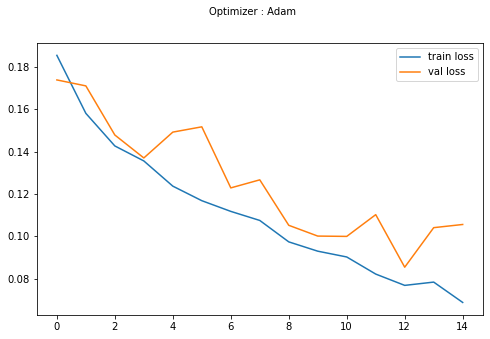

<Figure size 432x288 with 0 Axes>

In [30]:
#loss
plt.figure(figsize=(8, 5))
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Val_loss')